In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, losses
import cv2
import numpy as np 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
y_train.shape, x_train.shape

((50000, 10), (50000, 32, 32, 3))

In [6]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [7]:
model = Sequential()
# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, activation='relu', padding='same'))
model.add(MaxPool2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(128, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(256, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(Conv2D(512, 3, strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [9]:
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=50, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 74s 110ms/step - loss: 1.6065 - accuracy: 0.4305 - val_loss: 10.8782 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 41s 106ms/step - loss: 1.0472 - accuracy: 0.6315 - val_loss: 1.7171 - val_accuracy: 0.4872
Epoch 3/50
391/391 [==============================] - 41s 106ms/step - loss: 0.8292 - accuracy: 0.7174 - val_loss: 1.5320 - val_accuracy: 0.5422
Epoch 4/50
391/391 [==============================] - 41s 106ms/step - loss: 0.6856 - accuracy: 0.7710 - val_loss: 1.0048 - val_accuracy: 0.6840
Epoch 5/50
391/391 [==============================] - 41s 106ms/step - loss: 0.5822 - accuracy: 0.8067 - val_loss: 0.8771 - val_accuracy: 0.7230
Epoch 6/50
391/391 [==============================] - 41s 106ms/step - loss: 0.4869 - accuracy: 0.8418 - val_loss: 0.8387 - val_accuracy: 0.7560
Epoch 7/50
391/391 [==============================] - 41s 106ms/step - loss: 0.4121 - accuracy: 0.8641 - val_loss: 0.7020 - val_a

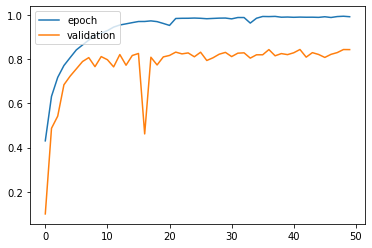

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(x_test, verbose=1)

313/313 [==============================] - 5s 15ms/step - loss: 1.5999 - accuracy: 0.8430
Test loss: 1.5999219417572021
Test accuracy: 0.8429999947547913
313/313 [==============================] - 4s 12ms/step
